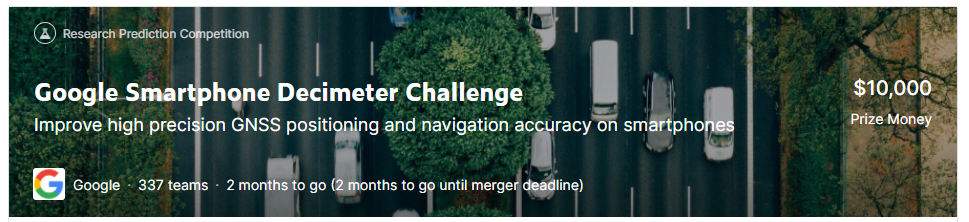

### 0から作成してみたのですが、まったく解法がわからず。やむをえず他の方のものをコピーして、勉強させていただいています。
### 分解しましたが、かなり内容は専門的で高度です。

thanks https://www.kaggle.com/jeongyoonlee/google-smartphone-decimeter-eda-keras-tpu  Mr.Jeong-Yoon Lee

🌴突然の甌穴やその他の道路の障害物にぶつかったことがありますか？ナビゲーションアプリがより正確な位置または車線レベルの精度を提供できることを望みますか？これらおよびその他の新しい機能は、スマートフォンのポジショニングサービスを利用しています。機械学習と精度のGNSSアルゴリズムは、この精度を向上させ、何十億ものAndroid携帯ユーザーにさらに微調整された測位体験を提供することが期待されています。

グローバルナビゲーション衛星システム（GNSS）は、GPSチップセットが位置を計算するために使用する生の信号を提供します。現在の携帯電話は、3〜5メートルの測位精度しか提供していません。多くの場合便利ですが、「ジャンピー」な体験を生み出すことができます。多くのユースケースでは、結果は良好ではなく、信頼できるほど安定していません。

Android GPSチームが主催するこのコンテストは、ION GNSS +2021カンファレンスで発表されています。彼らは、スマートフォンのGNSS測位精度の研究を進め、人々が自分たちの周りの世界をよりよくナビゲートできるよう支援しようとしています。

このコンテストでは、ホストチームのAndroidスマートフォンから収集したデータを使用して、可能であればデシメートルまたはセンチメートルの解像度まで位置を計算します。提出物をトレーニングおよびテストするために、正確なグラウンドトゥルース、生のGPS測定値、および近くのGPSステーションからの支援データにアクセスできます。

成功すれば、より正確な位置を作成するのに役立ち、より細かい人間の行動の地理空間情報と、はるかに細かい粒度のモバイルインターネットとの間の接続を橋渡しします。モバイルユーザーは、より良い車線レベルの座標、位置ベースのゲームのエクスペリエンスの向上、および交通安全の問題の場所のより高い特異性を得ることができます。あなたはあなたが行く必要があるところにあなたを連れて行くのがより簡単であることに気付くかもしれません。

# ＜ディスカッションメモ🌻＞<br>
・生のGNSSデータ<br>
trainとテストのフォルダにはそれぞれ、いくつかの異なる標準形式の生のGNSSデータと、読みやすいderivedcsv形式が含まれています。<br>
この生のgnssデータを完全に無視し、baseline_ファイルを処理するだけで開始できます。<br>
<font color="orange">生のGNSSには、個々の衛星までの実際の距離を把握し、それが緯度/経度にとって何を意味するかを把握するために必要なすべての基本情報が含まれています。 これは混乱を招く可能性があります！ だからそこから始めないでください:)<br>
これらのファイルにはIMUデータ（加速、ジャイロ、マグ）も含まれていますが、これはちょっと紛らわしいです-生のGNSS衛星データとIMUデータの両方が同じファイルにあるので、ファイルを注意深く解析して、 必要な情報。<br>
・GPSフィールドは、最初は気が遠くなるように見える可能性のある多くのドメイン知識を提示します。 この分野に不慣れな場合は、これらの層の問題を、複雑さや必要なドメイン知識の量の順に調べることをお勧めします。</font><br>
・このコンテストでは、時間はmillisSinceGpsEpochですが、生データの時間はutcTimeMillisです。
使用されるUTC時間は、1970年1月1日に開始されたUnix時間であり、GPS時間は1980年1月6日に開始されました。したがって、UTCからGPSに変換するには：
GPS（ms）= UTC（ms）-315964800000
ただし、これほど簡単なことはありません。各衛星ナビゲーションシステムはうるう秒を独自の方法で処理するため、うるう秒に注意する必要があります。 それらを考慮に入れるものもあれば、考慮しないものもあり、私たちの電話は衛星コンステレーション（ConstellationType）を頻繁に切り替えるようです。<br>
・基本的にログデータは最初からgt_csvと一致しているように見えるので、誰かがベースラインにマージする必要がある場合、これはペアコレクションで機能するはずです-電話：
（GPS_time_column-start_Baseline_time + 500）// 1000<br>
・{meta、summary、geospatial}データの探索と、上位のEDAノートブックの読み取りに時間を費やすことは、複雑な地理空間データの処理方法を学ぶ上で間違いなく有益です。
・機械学習が少ない
-機械学習アルゴリズム（主に勾配ブーストされたマシンとニューラルネットワークを参照）は、ほぼすべてのkaggleチャレンジで間違いなく役立ちます。そうは言っても、このデータを操作するときは、baseline_locations_testファイルにlatDeg列とlngDeg列があり、送信ファイルに配置すると、すでに約7.19のかなり良いスコアが生成されることに注意することが重要です。このため、他の後処理技術は、機械学習よりも価値のある結果を生み出す可能性があります。<br>
-<u>外れ値を修正する</u><br>
時系列パスのデータを処理しているため、外れ値の修正は特に有用であり、おそらく最初のステップの1つになるはずです。リ<br>
-平滑化データとカルマンフィルター<br>
<u>データ平滑化は、アルゴリズムを使用してデータセットからノイズを除去します。</u>これは、GPSデータを操作するときに非常に役立ちます。本当に強力な方法は、カルマンフィルターです（例はリンクされています）。カルマンフィルターには複数のバリエーションがあり、カルマン以外にも他の形式の平滑化があるため、多くの種類のデータ平滑化を試すことを強くお勧めします。<br>
-後処理<br>
データの平滑化以外に使用できる後処理には、他にもいくつかの種類があります。地理空間データの後処理について読むと、優位に立つことができます。<br>

In [ ]:
# --- CSS STYLE ---
from IPython.core.display import HTML
def css_styling():
    styles = open("../input/competiongoal/archive/alerts.css", "r").read()
    return HTML("<style>"+styles+"</style>")
css_styling()

<div class="alert simple-alert"><font color="black">
 <b>Competition ゴール</b> trainデータの中にしかないgrand_truth.csvのmillisSinceGpsEpoch latDeg lngDegを予測する。
</div>

# Load Libraries & Data

## <font color="#FE2EF7">simdkalman</font><br>
単一命令の複数データのベクトル化を利用した Python の高速カルマン フィルター。 つまり、n 個の独立した一連の観測に対して n 個の類似したカルマン フィルターを実行します。 SIMD プロセッサの命令と混同しないでください。 examples/benchmark.py によると。 これは、多くの独立した時系列でベクトル化できる場合、pykalman よりも最大 100 倍、filterpy よりも 70 倍高速になります。 また、ベクトル化されていない場合でも、2 倍高速になります。<br>

=>難しいですが、ディスカッションメモにも書いてあるとおり、今回のコンペでは必要な機能になります。

In [ ]:
!pip install simdkalman

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np # linear algebra
from pathlib import Path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import sparse
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import simdkalman
import tensorflow as tf
from tensorflow import keras
from tqdm.notebook import tqdm
from warnings import simplefilter

simplefilter('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

In [ ]:
model_name = 'nn_v2'

data_dir = Path('../input/google-smartphone-decimeter-challenge')
train_file = data_dir / 'baseline_locations_train.csv'
test_file = data_dir / 'baseline_locations_test.csv'
sample_file = data_dir / 'sample_submission.csv'

build_dir = Path('./build')
build_dir.mkdir(parents=True, exist_ok=True)
predict_val_file = build_dir / f'{model_name}.val.txt'
predict_tst_file = build_dir / f'{model_name}.tst.txt'
submission_file = 'submission.csv'

cname_col = 'collectionName'
pname_col = 'phoneName'
phone_col = 'phone'
ts_col = 'millisSinceGpsEpoch'
dt_col = 'datetime'
lat_col = 'latDeg'
lon_col = 'lngDeg'

lrate = .002 #.001
batch_size = 1024
epochs = 100
n_stop = 10
n_fold = 5
seed = 77

### EDA

In [ ]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

### 🔎trainデータのcollectionNameとphoneの関係

In [ ]:
train.groupby('collectionName').apply(lambda x: x['phoneName'].unique())

### 🔎testデータのcollectionNameとphoneの関係

In [ ]:
test.groupby('collectionName').apply(lambda x: x['phoneName'].unique())

In [ ]:
train.phoneName.unique()

📔・millisSinceGpsEpoch-GPSエポック（1980/1/6真夜中UTC）からの整数ミリ秒。 その値は等しい<br>
・latDeg、lngDeg-参照GNSS受信機（NovAtel SPAN）によって推定されたWGS84の緯度、経度（10進度）。 場所を予想される非整数のタイムスタンプに合わせるために、必要に応じて線形補間が適用されています。<br>
・heightAboveWgs84EllipsoidM-参照GNSS受信機によって推定されたWGS84楕円体からの高さ（メートル単位）。

# 🔖なにを予測するか
📔df_testの中の答えじゃだめなの？=>だめでした。<br>
trainデータの中にしかないgrand_truth.csvのmillisSinceGpsEpoch	latDeg	lngDeg　を予測する。

### そのまんまtestデータを変換して出すとどうなるの？=>7.187というスコアになります。0点かと思ったけど、スコアついた。
### つまり、誤差がでかいということ。grand_truthが正解なのでそれを学習してあげる必要があるというのが今回のコンテストだと理解しました。😊

## ⏳わからないから、trainフォルダのファイルを全部読んでみる

# 🔓supplemental

## Pixel4_GnssLog.20o
読んだものの、どうしたらいいかわからない。

In [ ]:
f = open('../input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/supplemental/Pixel4_GnssLog.20o', 'r')
data = f.readlines()
f.close()
data[:20]

## 💼SPAN_Pixel4_10Hz.nmea
これも見方がわからない。

In [ ]:
f = open('../input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/supplemental/SPAN_Pixel4_10Hz.nmea', 'r')
data = f.readlines()
f.close()
data[:10]

### トレインデータにしかないもの。ground_truth.csv　つまり正解データ

In [ ]:
ground = pd.read_csv('../input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/ground_truth.csv')
ground.head(5)

📔・collectionName-「グランド」親フォルダーの名前。<br>
・hDop-GGAセンテンスからの高精度DOPの水平希釈は、測定のエラーが最終的な水平位置推定にどのように影響するかを説明します。<br>
・vDop-GSAセンテンスからの高精度DOPの垂直希釈は、測定値のエラーが最終的な垂直位置推定にどのように影響するかを示します。<br>
・speedMps-地上の速度（メートル/秒）。<br>
・courseDegree-地上の真北に対する時計回りのコース角度（度単位）。<br>
・millisSinceGpsEpoch-GPSエポック（1980/1/6真夜中UTC）からの整数ミリ秒。 その値は等しい<br>
・latDeg、lngDeg-参照GNSS受信機（NovAtel SPAN）によって推定されたWGS84の緯度、経度（10進度）。 場所を予想される非整数のタイムスタンプに合わせるために、必要に応じて線形補間が適用されています。<br>
・courseDegree-地上の真北に対する時計回りのコース角度（度単位）。

### 💼Pixel4_GnssLog.txt


In [ ]:
f = open('../input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/Pixel4_GnssLog.txt', 'r')
data = f.readlines()
f.close()
data[:10]

## 💼Pixel4_derived.csv

In [ ]:
derived = pd.read_csv('../input/google-smartphone-decimeter-challenge/train/2020-05-14-US-MTV-1/Pixel4/Pixel4_derived.csv')
derived

In [ ]:
derived_unique = list(derived.millisSinceGpsEpoch.unique())
len(derived_unique)

In [ ]:
ground_unique = list(ground.millisSinceGpsEpoch.unique())
len(ground_unique)

# 💼metadataのファイルを読んでみる

In [ ]:
import json
json_open = open('../input/google-smartphone-decimeter-challenge/metadata/accumulated_delta_range_state_bit_map.json', 'r')
json.load(json_open)

## 💼raw_state_bit_map.json

In [ ]:
import json
json_open = open('../input/google-smartphone-decimeter-challenge/metadata/raw_state_bit_map.json', 'r')
json.load(json_open)

📔[train / test] / [drive_id] / [phone_name] / [phone_name] _GnssLog.txt-GnssLoggerアプリによって生成された電話のログ。 このノートブックは、ログを解析する方法を示しています。 各gnssファイルには、いくつかのサブデータセットが含まれています

## 💼constellation_type_mapping.csv

In [ ]:
pd.read_csv('../input/google-smartphone-decimeter-challenge/metadata/constellation_type_mapping.csv').head(5)

# データ作成

# ①

In [ ]:
# from https://www.kaggle.com/sohier/loading-gnss-logs
def gnss_log_to_dataframes(path):
    print('Loading ' + path, flush=True)
    gnss_section_names = {'Raw','UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg'} #これはどこからでてきたのか？
    with open(path) as f_open:
        datalines = f_open.readlines()

    datas = {k: [] for k in gnss_section_names}
    gnss_map = {k: [] for k in gnss_section_names}
    for dataline in datalines:
        is_header = dataline.startswith('#')
        dataline = dataline.strip('#').strip().split(',')
        # skip over notes, version numbers, etc
        if is_header and dataline[0] in gnss_section_names:
            gnss_map[dataline[0]] = dataline[1:]
        elif not is_header:
            datas[dataline[0]].append(dataline[1:])

    results = dict()
    for k, v in datas.items():
        results[k] = pd.DataFrame(v, columns=gnss_map[k])
    # pandas doesn't properly infer types from these lists by default
    for k, df in results.items():
        for col in df.columns:
            if col == 'CodeType':
                continue
            results[k][col] = pd.to_numeric(results[k][col])

    return results

In [ ]:
gnss_section_names = {'Raw','UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg'}
datas = {k: [] for k in gnss_section_names}
gnss_map = {k: [] for k in gnss_section_names}
datas

<pre><font color="orange">Pythonの辞書（dict）のforループ処理の仕方（keys, values, items）</font>

　　keys(): 各要素のキーkeyに対してforループ処理
　　values(): 各要素の値valueに対してforループ処理
　　items(): 各要素のキーkeyと値valueに対してforループ処理</pre>

In [ ]:
results = dict()
for k, v in datas.items():
     results[k] = pd.DataFrame(v, columns=gnss_map[k])
results

# ②

In [ ]:
# from https://www.kaggle.com/dannellyz/start-here-simple-folium-heatmap-for-geo-data
import folium
from folium import plugins


def simple_folium(df:pd.DataFrame, lat_col:str, lon_col:str):
    """

     ----------
         マーカー付きの単純な Folium HeatMap を返します。
     ----------
     パラメーター
     ----------
         df :padnas データフレーム、必須
             マッピングするデータを含む DataFrane
         lat_col : str、必須
             緯度を持つ列の名前
         lon_col : str、必須
             経度を持つ列の名前 
    """
    #Preprocess
    #Drop rows that do not have lat/lon
    df = df[df[lat_col].notnull() & df[lon_col].notnull()]

    # Convert lat/lon to (n, 2) nd-array format for heatmap
    # Then send to list
    df_locs = list(df[[lat_col, lon_col]].values)

    ##folium.Mapオブジェクト作成
    fol_map = folium.Map([df[lat_col].median(), df[lon_col].median()])

    # plot heatmap
    heat_map = plugins.HeatMap(df_locs)
    print(heat_map)
    fol_map.add_child(heat_map)

    # plot markers
    markers = plugins.MarkerCluster(locations = df_locs)
    fol_map.add_child(markers)

    #Add Layer Control
    folium.LayerControl().add_to(fol_map)

    return fol_map

### <font color="orange">foliumの概要</font><br>
foliumはleaflet.jsというJavascriptで使用することのできるマップをPythonライブラリ化したものです。これにより、Pythonで簡易的にマップを用いてデータの可視化を行えます。

マップはOpenStreetMapが標準として使用できます。さらに、Mapboxといったマップも自身で取得したAPI keyを用いることで利用可能になります。

In [ ]:
# from https://www.kaggle.com/jpmiller/baseline-from-host-data
# simplified haversine distance
def calc_haversine(lat1, lon1, lat2, lon2):
    """2 点間の大円距離を計算します
     地球上で。 入力は配列に似ており、10 進度で指定されます。
    """
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(a**0.5)
    dist = 6_367_000 * c
    return dist

### <font color="orange">カルマンフィルター</font>

> カルマンフィルターとは、過去(1時刻前)の推定値と現在のシステムへの入力およびシステムから計測した値からシステムの状態を推定する方法になります。ただし、入力には雑音が乗っており、計測した値にも雑音が乗っているものとします。
> 
> 例えばセンサーで採取した信号には、必ず雑音が混入されます。カルマンフィルターはこのような実現象の影響を加味した考え方で構築されるアルゴリズムで、確率的な枠組みで状態推定を行うことでシステマティックに最適設計をすることができます。
> 
> まず初めに、カルマンフィルターを構築するにあたり、入力から推定値を算出するために、制御対象となる数学モデルを算出する必要があります

In [ ]:
# from https://www.kaggle.com/emaerthin/demonstration-of-the-kalman-filter　をそのまま使っている。
T = 1.0 #ここらへんの数値はチューニングしようがないですね。
state_transition = np.array([[1, 0, T, 0, 0.5 * T ** 2, 0], [0, 1, 0, T, 0, 0.5 * T ** 2], [0, 0, 1, 0, T, 0],
                             [0, 0, 0, 1, 0, T], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]])
process_noise = np.diag([1e-5, 1e-5, 5e-6, 5e-6, 1e-6, 1e-6]) + np.ones((6, 6)) * 1e-9
observation_model = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
observation_noise = np.diag([5e-5, 5e-5]) + np.ones((2, 2)) * 1e-9

kf = simdkalman.KalmanFilter(
        state_transition = state_transition,
        process_noise = process_noise,
        observation_model = observation_model,
        observation_noise = observation_noise)

def apply_kf_smoothing(df, kf_=kf):
    unique_paths = df[phone_col].unique()
    for phone in tqdm(unique_paths):
        data = df.loc[df[phone_col] == phone][[lat_col, lon_col]].values
        data = data.reshape(1, len(data), 2)
        smoothed = kf_.smooth(data)
        df.loc[df[phone_col] == phone, lat_col] = smoothed.states.mean[0, :, 0]
        df.loc[df[phone_col] == phone, lon_col] = smoothed.states.mean[0, :, 1]
    return df

millisSinceGpsEpoch : GPS エポック (1980/1/6 午前 0 時 UTC) からの整数のミリ秒数。<br>
<font color="#008800">latDeg、lngDeg : GNSS 受信機 (NovAtel SPAN) によって推定された WGS84 緯度、経度 (10 進度)。 位置を予想される非整数のタイムスタンプに合わせるために、必要に応じて線形補間が適用されています。</font><br>
heightAboveWgs84EllipsoidM -:GNSS 受信機によって推定された WGS84 楕円体上の高さ (メートル単位)。

> GNSS（Global Navigation Satellite System / 全球測位衛星システム）は、GPS、準天頂衛星（QZSS）、GLONASS、Galileo等の衛星測位システムの総称です。GNSS測量は、地球上空を周回するGNSS衛星から送られる電波を利用して、座標を求める高精度な測量方法です。測点に据え付けた受信機で上空からの電波を受信するだけなので、これまでのような測点間の視通の確保や天候の良し悪しに無関係に測量が実施できます。
> 
> 　GNSS測量は、3次元の高精度測量が可能であり、測量作業も軽減化・効率化が図れるため、現在、測地測量の主流になっています。
> 
> 　カーナビやスマートフォンなどのGNSSにより得られる座標値は、一般的にWGS 84座標系で表されています。 WGS 84座標系とITRF座標系はともに地球中心の座標系です。WGS 84はこれまでに数回の改定を行っていますが、その都度ITRF系に接近し現在はほとんど同一のものとして扱っても問題なく、実用上の違いはありません。ただし、日本国内の測量ではITRF座標系GRS80楕円体を用いるよう定められています。
> 

In [ ]:
trn = pd.read_csv(train_file)
print(trn.shape)
trn.head()

In [ ]:
tst = pd.read_csv(test_file)
print(tst.shape)
tst.head()

In [ ]:
sub = pd.read_csv(sample_file)
print(sub.shape)
sub.head()

# ①

In [ ]:
cname = trn[cname_col][0]
cname

In [ ]:
pname = trn[pname_col][0]
pname

In [ ]:
path =str(data_dir / 'train' / cname / pname / f'{pname}_GnssLog.txt')
with open(path) as f_open:
        datalines = f_open.readlines()

In [ ]:
    for dataline in datalines:
        is_header = dataline.startswith('#')
        dataline = dataline.strip('#').strip().split(',')
        break

{'Raw','UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg'} をキーにして拾っている

In [ ]:
datalines[:10]

# Aggregated Data EDA

## `collectionName`, `phoneName`

In [ ]:
for col in [cname_col, pname_col]:
    print(f'# of unique {col:>14s} in training: {trn[col].nunique():4d}')
    print(f'# of unique {col:>14s}     in test: {tst[col].nunique():4d}')

In [ ]:
trn[pname_col].value_counts()

In [ ]:
tst[pname_col].value_counts()

In [ ]:
print(f'# of unique phone in training: {trn[phone_col].nunique():4d}')
print(f'    # of unique phone in test: {tst[phone_col].nunique():4d}')

In [ ]:
trn[phone_col].value_counts()[:10]

In [ ]:
tst[phone_col].value_counts()[:10]

各mobile-phoneには、577 ～ 3,517 の範囲のかなりの量のデータポイントがあるようです。

In [ ]:
overlapping_phones = [x for x in tst[phone_col] if x in trn[phone_col]]
print(len(overlapping_phones))

トレーニング データとテスト データの間に重複するmobile-phoneはないです。

## `millisSinceGpsEpoch`

In [ ]:
tst[ts_col].min(), tst[ts_col].max()

データの説明によると、`millisSinceGpsEpoch` は「GPS エポック (1980/1/6 午前 0 時 UTC) からのミリ秒数を表す整数です。 次のように「pd.to_datetime()」を使用して、それらを「datatime64」に変換できます。

In [ ]:
dt_offset = pd.to_datetime('1980-01-06 00:00:00')
print(dt_offset)
dt_offset_in_ms = int(dt_offset.value / 1e6)

In [ ]:
trn[dt_col] = pd.to_datetime(trn[ts_col] + dt_offset_in_ms, unit='ms')
tst[dt_col] = pd.to_datetime(tst[ts_col] + dt_offset_in_ms, unit='ms')
print(f'Training data range: {trn[dt_col].min()} - {trn[dt_col].max()}')
print(f'    Test data range: {tst[dt_col].min()} - {tst[dt_col].max()}')

## `latDeg` and `lngDeg`

トレーニング データとテスト データの間の推定位置がどのように見えるかを見ます。 トレーニング データのグラウンド トゥルースは、「{collectionName}/{phoneName}/ground_truth.csv」の「phone」ごとに利用できるようです。

In [ ]:
latlon_trn = trn[[lat_col, lon_col]].round(3)
latlon_trn['counts'] = 1
latlon_trn = latlon_trn.groupby([lat_col, lon_col]).sum().reset_index()
latlon_trn.head()

# ②

In [ ]:
    #def simple_folium(df:pd.DataFrame, lat_col:str, lon_col:str):
    simple_folium(latlon_trn, lat_col, lon_col)
    df = pd.DataFrame(latlon_trn)
    
    """

     ----------
         マーカー付きの単純な Folium HeatMap を返します。
     ----------
     パラメーター
     ----------
         df :padnas データフレーム、必須
             マッピングするデータを含む DataFrane
         lat_col : str、必須
             緯度を持つ列の名前
         lon_col : str、必須
             経度を持つ列の名前 
    """
    #Preprocess
    #Drop rows that do not have lat/lon
    df = df[df[lat_col].notnull() & df[lon_col].notnull()]
    df


正解データのlanDeg,ingDegをカウント

In [ ]:

    # Convert lat/lon to (n, 2) nd-array format for heatmap
    # Then send to list
    df_locs = list(df[[lat_col, lon_col]].values)
    

In [ ]:
df[lat_col].median() #中央値

In [ ]:
    ##folium.Mapオブジェクト作成
    fol_map = folium.Map([df[lat_col].median(), df[lon_col].median()])


アドレスの中央値を指定して地図を表示

In [ ]:
    # plot heatmap
    heat_map = plugins.HeatMap(df_locs)
    print(heat_map)

In [ ]:
    fol_map.add_child(heat_map)
 

 ここで地図とheatmapを合成している。

In [ ]:

    # plot markers
    markers = plugins.MarkerCluster(locations = df_locs)
    

In [ ]:
len(df_locs)

In [ ]:
df_locs[:10]

In [ ]:
fol_map.add_child(markers)

 add.childで数字をいれている

In [ ]:
    #Add Layer Control
    folium.LayerControl().add_to(fol_map)

# トレインデータ

In [ ]:
simple_folium(latlon_trn, lat_col, lon_col)

In [ ]:
latlon_trn = trn[[lat_col, lon_col]].round(3)
latlon_trn['counts'] = 1
latlon_trn = latlon_trn.groupby([lat_col, lon_col]).sum().reset_index()
latlon_trn

# テストデータ

In [ ]:
latlon_tst = tst[[lat_col, lon_col]].round(3)


In [ ]:
latlon_tst['counts'] = 1
latlon_tst = latlon_tst.groupby([lat_col, lon_col]).sum().reset_index()
latlon_tst

In [ ]:
simple_folium(latlon_tst, lat_col, lon_col)

# Phone Level Data EDA

## GNSS Logs

In [ ]:
cname = trn[cname_col][0]
cname

In [ ]:
pname = trn[pname_col][0]
pname

In [ ]:
dfs = gnss = gnss_log_to_dataframes(str(data_dir / 'train' / cname / pname / f'{pname}_GnssLog.txt'))
print(dfs.keys())

In [ ]:
df_raw = dfs['Raw']
print(df_raw.shape)
df_raw.head()

<font color="orange">utcTimeMillis : UTC エポック (1970/1/1) からのミリ秒、GnssClock から変換</font><br>
TimeNanos - ナノ秒単位の GNSS 受信機の内部ハードウェア クロック値。<br>
LeapSecond - クロックの時間に関連付けられたうるう秒。<br>
TimeUncertaintyNanos - クロックの時間の不確実性 (1 シグマ) (ナノ秒単位)。<br>
FullBiasNanos - GPS 受信機内のハードウェア クロック getTimeNanos() と、1980 年 1 月 6 日の 0000Z 以降の実際の G​​PS 時間との差 (ナノ秒単位)。<br>
BiasNanos - クロックのサブナノ秒バイアス。<br>
BiasUncertaintyNanos - クロックのバイアスの不確実性 (1 シグマ) (ナノ秒単位)。<br>
DriftNanosPerSecnd - クロックのドリフト (ナノ秒/秒)。<br>
DriftUncertaintyNanosPerSecond - クロックのドリフトの不確実性 (1 シグマ) (ナノ秒/秒)。<br>
HardwareClockDiscontinuityCount - ハードウェア クロックの不連続性の数。<br>
<font color="orange">Svid - サテライト ID。詳細については、こちらをご覧ください。https://developer.android.com/reference/android/location/GnssMeasurement#getSvid%28%29</font><br>
-このsvidは、ほとんどのコンステレーションの疑似乱数です。 GlonassのFCN＆OSN番号です。<br>
TimeOffsetNanos - 測定値がナノ秒単位で取得された時間オフセット。<br>
state - サテライトの同期状態を示す整数。整数の各ビットは、測定の特定の状態情報に属します。ビットと状態のマッピングについては、metadata/raw_state_bit_map.json ファイルを参照してください。<br>
<u>ReceivedSvTimeNanos - 測定時に受信した GNSS 衛星時間 (ナノ秒単位)。</u><br>
ReceivedSvTimeUncertaintyNanos - 受信した GNSS 時間のエラー推定値 (1 シグマ) (ナノ秒単位)。<br>
Cn0DbHz - dB-Hz 単位の搬送波対雑音密度。<br>
PseudorangeRateMetersPerSecond - タイムスタンプでの擬似距離レート (m/s)。<br>
PseudorangeRateUncertaintyMetersPerSecond - 擬似距離のレートの不確実性 (1 シグマ) (m/s)。<br>
AccumulatedDeltaRangeState - これは、「累積デルタ範囲」測定の状態を示します。整数の各ビットは、測定の状態に属性します。ビットと状態のマッピングについて<br>AccumulatedDeltaRangeState - これは、「累積デルタ範囲」測定の状態を示します。整数の各ビットは、測定の状態に属性します。ビットと状態のマッピングについては、metadata/accumulated_delta_range_state_bit_map.json ファイルを参照してください。。<br>
AccumulatedDeltaRangeMeters - 最後のチャネル リセット以降の累積デルタ範囲 (メートル単位)。<br>
AccumulatedDeltaRangeUncertaintyMeters - メートル単位の累積デルタ範囲の不確実性 (1 シグマ)。<br>
CarrierFrequencyHz - 追跡された信号のキャリア周波数。<br>
CarrierCycles - 衛星と受信機の間の完全なキャリア サイクルの数。これらのデータセットでは Null です。<br>
CarrierPhase - 受信機によって検出された RF 位相。これらのデータセットでは Null です。<br>
CarrierPhaseUncertainty - キャリア フェーズの不確実性 (1 シグマ)。これらのデータセットでは Null です。<br>
MultipathIndicator - イベントの「マルチパス」状態を示す値。<br>
SnrInDb - (相関および積分後の) 信号対雑音比 (SNR) (dB)。<br>
ConstellationType - GNSS コンスタレーション タイプ。これは整数であり、文字列値へのマッピングは constellation_type_mapping.csv ファイルで提供されます。<br>
AgcDb - dB 単位の自動ゲイン制御レベル。


In [ ]:
df_raw.info()

携帯電話の GNSS チップセットからの測定値は、ノイズが多く、誤差が大きいことがよくあります。適用 (除外) できるフィルターの例は次のとおりです。<br>
<br>

1. 「FullBiasNanos」 (GNSS Raw) がゼロまたは無効
2. 「BiasUncertaintyNanos」 (GNSS Raw) が大きすぎる (> 1e6)
3. 到着時間が負または非現実的に長い - 「rawPrM」から計算できる (派生)
4. 未知の星座 (`constellationType == 0`) (派生、GNSS Raw)
5. 「TimeNanos」が空 (GNSS Raw)
6. 「State」が (「STATE_TOW_DECODED」、「STATE_TOW_KNOWN」、「STATE_GLO_TOD_DECODED」、「STATE_GLO_TOD_KNOWN」) にない (GNSS Raw)
7. 「ReceivedSvTimeUncertaintyNanos」が高い (500 ns) (GNSS Raw)
8. この条件に違反する「AccumulatedDeltaRangeState」: 「ADR_STATE_VALID == 1 & ADR_STATE_RESET == 0 & ADR_STATE_CYCLE_SLIP == 0」 (GNSS Raw)
9. 「AccumulatedDeltaRangeUncertaintyMeters」が高い (GNSS Raw)
10. 「Cn0DbHz」が 20 db-Hz 未満 (GNSS Raw)

In [ ]:
df_raw['ArrivalTime'] = df_raw['TimeNanos'] - df_raw['FullBiasNanos'] - df_raw['BiasNanos']
print(df_raw['ArrivalTime'].describe())
df_raw['ArrivalTime'].hist(bins=20)

In [ ]:
print(df_raw['BiasUncertaintyNanos'].describe())
df_raw['BiasUncertaintyNanos'].hist(bins=20)

In [ ]:
print(df_raw['ReceivedSvTimeUncertaintyNanos'].describe())
df_raw['ReceivedSvTimeUncertaintyNanos'].hist(bins=20)

In [ ]:
print(df_raw.AccumulatedDeltaRangeUncertaintyMeters.describe())
df_raw.AccumulatedDeltaRangeUncertaintyMeters.hist(bins=20)

In [ ]:
print(df_raw.Cn0DbHz.describe())
df_raw.Cn0DbHz.hist(bins=20)

In [ ]:
df_raw = df_raw.loc[
    ~pd.isnull(df_raw.FullBiasNanos) &
    (df_raw.BiasUncertaintyNanos < 100) &
    (df_raw.ArrivalTime > 0) &
    (df_raw.ConstellationType != 0) &
    ~pd.isnull(df_raw.TimeNanos) &
    (df_raw.State != 3) & (df_raw.State != 14) & (df_raw.State != 7) & (df_raw.State != 15) &
    (df_raw.ReceivedSvTimeUncertaintyNanos < 100) &
    (df_raw.AccumulatedDeltaRangeUncertaintyMeters < 0.3) &
    (df_raw.Cn0DbHz > 20)
]
print(df_raw.shape)

In [ ]:
df_raw

## Derived Values

In [ ]:
derived = pd.read_csv(data_dir / 'train' / cname / pname / f'{pname}_derived.csv')
print(derived.shape)
derived.head()

In [ ]:
derived.info()

In [ ]:
derived = derived.loc[derived.constellationType != 0]
print(derived.shape)

In [ ]:
derived

データの説明に記載されているように、「correctedPrM」を計算します。
```
修正されたPrM = rawPrM + satClkBiasM - isrbM -ionoDelayM - tropoDelayM
```
「ベースラインの位置は、標準の加重最小二乗 (WLS) ソルバーを使用して、補正されたPrM と衛星の位置を使用して計算されます。電話の位置 (x、y、z)、クロック バイアス (t)、および各固有の信号タイプの isrbM は次のようになります。 」


In [ ]:
derived['correctedPrM'] = (derived['rawPrM'] + derived['satClkBiasM'] - derived['isrbM'] - 
                           derived['ionoDelayM'] - derived['tropoDelayM'])
sns.pairplot(data=derived, vars=['correctedPrM', 'rawPrM'], size=3)

In [ ]:
derived[dt_col] = pd.to_datetime(derived[ts_col] + dt_offset_in_ms, unit='ms')
print(f'Data range for {cname}/{pname}: {derived[dt_col].min()} - {derived[dt_col].max()}')

データは 30 分または 1,800 秒です。 ただし、もっと多くのサンプル (55K) があります。 これは、毎秒、異なる「constellationType」、「svid」、および「signalType」を持つ複数のサンプルがあるためです。

In [ ]:
derived[['constellationType', 'svid', 'signalType']].value_counts()

In [ ]:
derived[[ts_col, 'constellationType', 'correctedPrM']].groupby([ts_col, 'constellationType']).agg(['mean', 'std', 'count']).describe()

In [ ]:
derived.loc[derived.constellationType == 1][[ts_col, 'svid', 'correctedPrM']].groupby([ts_col, 'svid']).agg(['mean', 'std', 'count']).describe()

コンステレーション タイプが「1」(または GPS) の場合、同じ衛星からの各エポックは、信号タイプが異なるため、「coorectedPrM」が異なる可能性があります。

### コンステレーションタイプ

In [ ]:
pd.read_csv('../input/google-smartphone-decimeter-challenge/metadata/constellation_type_mapping.csv')

In [ ]:
derived.loc[derived.signalType == 'GPS_L1'][[ts_col, 'svid', 'correctedPrM']].groupby([ts_col, 'svid']).agg(['mean', 'std', 'count'])

In [ ]:
derived.loc[derived.signalType == 'GPS_L1'][[ts_col, 'svid', 'correctedPrM']].groupby([ts_col, 'svid']).agg(['mean', 'std', 'count']).describe()

同じ衛星からの「GPS_L1」の信号タイプを考えると、各エポックはユニークです。

In [ ]:
derived.loc[derived.signalType == 'GPS_L1'][[ts_col, 'svid']].drop_duplicates().groupby([ts_col]).agg(['mean', 'std', 'count']).describe()

「GPS_L1」の信号タイプが与えられた各エポックには、少なくとも 3 つの衛星からの信号があります。

In [ ]:
gps_l1 = derived.loc[derived.signalType == 'GPS_L1'][[ts_col, 'svid', 'correctedPrM']].drop_duplicates([ts_col, 'svid'])
print(gps_l1.shape)
gps_l1.head()

## Ground Truth

In [ ]:
label = pd.read_csv(data_dir / 'train' / cname / pname / 'ground_truth.csv')
print(label.shape)
label.head()

55K行ありますが、「ground_truth.csv」には1,740行しかありません。

In [ ]:
label[dt_col] = pd.to_datetime(label[ts_col] + dt_offset_in_ms, unit='ms')
print(f'Labels range for {cname}/{pname}: {label[dt_col].min()} - {label[dt_col].max()}')

これは変です。 ラベル データは、derivedデータよりも 1 秒早く始まります。 これは、derviedデータとラベル データを結合すると、最初の 2 番目にderived列の NaN が含まれることを意味します。 別の電話データを確認してみましょう。

In [ ]:
cname = trn[cname_col][10]
pname = trn[pname_col][10]
derived2 = pd.read_csv(data_dir / 'train' / cname / pname / f'{pname}_derived.csv')
label2 = pd.read_csv(data_dir / 'train' / cname / pname / 'ground_truth.csv')
print(f"Derived data starts at: {pd.to_datetime(derived2[ts_col].min() + dt_offset_in_ms, unit='ms')}")
print(f"  Label data starts at: {pd.to_datetime(label2[ts_col].min() + dt_offset_in_ms, unit='ms')}")

1秒のずれがあります。

In [ ]:
derived2

In [ ]:
label2

# Feature Generation

## Label Data Aggregation

In [ ]:
trn.head(5)

In [ ]:
trn.sort_values([phone_col, ts_col], inplace=True)

プレビューデータをつくるためにshiftで１行づらしている。なので1行目はNaNになる。

In [ ]:
trn[['prev_lat']] = trn[lat_col].shift().where(trn[phone_col].eq(trn[phone_col].shift()))
trn[['prev_lat']] 

In [ ]:
trn[['prev_lon']] = trn[lon_col].shift().where(trn[phone_col].eq(trn[phone_col].shift()))
trn[['prev_lon']]

In [ ]:
tst.head(5)

In [ ]:
tst.sort_values([phone_col, ts_col], inplace=True)

In [ ]:
tst.head(5)

In [ ]:
tst[['prev_lat']] = tst[lat_col].shift().where(tst[phone_col].eq(tst[phone_col].shift()))
tst[['prev_lat']] 

In [ ]:
tst[['prev_lon']] = tst[lon_col].shift().where(tst[phone_col].eq(tst[phone_col].shift()))
trn.head()

In [ ]:
# from https://www.kaggle.com/jpmiller/baseline-from-host-data
label_files = (data_dir / 'train').rglob('ground_truth.csv')
label_files

In [ ]:
cols = [phone_col, ts_col, lat_col, lon_col]

df_list = []
for t in tqdm(label_files, total=73):
    label = pd.read_csv(t, usecols=[cname_col, pname_col, ts_col, lat_col, lon_col])
    df_list.append(label)
   

<pre>出力例<br>
[           collectionName phoneName  millisSinceGpsEpoch     latDeg  \ >
 0     2020-07-17-US-MTV-1       Mi8        1279059935000  37.428281   
 1     2020-07-17-US-MTV-1       Mi8        1279059936000  37.428281  
 2     2020-07-17-US-MTV-1       Mi8        1279059937000  37.428281  
 3     2020-07-17-US-MTV-1       Mi8        1279059938000  37.428281   
 4     2020-07-17-US-MTV-1       Mi8        1279059939000  37.428281  
 ...                   ...       ...                  ...        ...  
 2090  2020-07-17-US-MTV-1       Mi8        1279062025000  37.524305   
 2091  2020-07-17-US-MTV-1       Mi8        1279062026000  37.524305  
 2092  2020-07-17-US-MTV-1       Mi8        1279062027000  37.524305  
 2093  2020-07-17-US-MTV-1       Mi8        1279062028000  37.524305   
 2094  2020-07-17-US-MTV-1       Mi8        1279062029000  37.524305  
 
           lngDeg  
 0    -122.072541  
 1    -122.072541  
 2    -122.072541  
 3    -122.072541 
 4    -122.072541  
 ...          ...  
 2090 -122.352372  
 2091 -122.352372 
 2092 -122.352372  
 2093 -122.352372  
 2094 -122.352372  </pre>

In [ ]:
df_label = pd.concat(df_list, ignore_index=True)
df_label

<font color="orange">pd.concatをつかってpandasファイルにしている。</font><br>
concatを使って結合しないやりかたがあるということ。

In [ ]:
pd.DataFrame(df_list)[:5]

単純にPandasにいれるとこんな形になってしまう。

In [ ]:
df_label[phone_col] = df_label[cname_col] + '_' + df_label[pname_col]
df_label

In [ ]:
trn

In [ ]:
phone_col

In [ ]:
cols

In [ ]:
ts_col

In [ ]:
df = df_label.merge(trn[cols + ['prev_lat', 'prev_lon']], how='inner', on=[phone_col, ts_col], 
                    suffixes=('_gt', '')).drop([cname_col, pname_col], axis=1) #列名が重複している場合のサフィックスを指定: 引数suffixes
df

In [ ]:
df['sSinceGpsEpoch'] = df[ts_col] // 1000 ## 切り捨て除算
print(df.shape)
df.head()

In [ ]:
df_tst = sub[[phone_col, ts_col]].merge(tst[[phone_col, ts_col, lat_col, lon_col, 'prev_lat', 'prev_lon']], 
                                        how='left', on=[phone_col, ts_col], suffixes=('', '_basepred'))
df_tst

In [ ]:
df_tst['sSinceGpsEpoch'] = df_tst[ts_col] // 1000
print(df_tst.shape)
df_tst.head()

## Derived Data Aggregation

In [ ]:
derived_files = (data_dir / 'train').rglob('*_derived.csv')
cols = [ts_col, 'svid', 'correctedPrM']
derived_files

In [ ]:
df_list = []
for t in tqdm(derived_files, total=73):
    derived = pd.read_csv(t).drop_duplicates([ts_col, 'svid'])
    derived['correctedPrM'] = (derived['rawPrM'] + derived['satClkBiasM'] - derived['isrbM'] - 
                               derived['ionoDelayM'] - derived['tropoDelayM'])
    df_list.append(derived[[cname_col, pname_col, ts_col, 'svid', 'correctedPrM']])

In [ ]:
df_derived = pd.concat(df_list, ignore_index=True)
df_derived

In [ ]:
df_derived[phone_col] = df_derived[cname_col] + '_' + df_derived[pname_col]
df_derived[phone_col] 

In [ ]:
df_derived.drop([cname_col, pname_col], axis=1, inplace=True)

print(df_derived.shape)
df_derived.head()

In [ ]:
df_derived_pivot = pd.pivot_table(df_derived, 
                                  values='correctedPrM', 
                                  index=[phone_col, ts_col],
                                  columns=['svid'],
                                  aggfunc=np.mean)
df_derived_pivot 

In [ ]:
df_derived_pivot.columns = [f'svid_{x}' for x in df_derived_pivot.columns]
df_derived_pivot.columns

In [ ]:
df_derived_pivot.reset_index(inplace=True)
df_derived_pivot

In [ ]:
df_derived_pivot['sSinceGpsEpoch'] = df_derived_pivot[ts_col] // 1000

print(df_derived_pivot.shape)
df_derived_pivot.head()

In [ ]:
df = df.merge(df_derived_pivot, how='left', on=[phone_col, 'sSinceGpsEpoch'], suffixes=['', '_2'])
df.drop(['sSinceGpsEpoch', ts_col + '_2'], axis=1, inplace=True)
print(df.shape)
df.head()

In [ ]:
df['d_lat'] = df['latDeg_gt'] - df[lat_col]
df['d_lon'] = df['lngDeg_gt'] - df[lon_col]
df[['d_lat', 'd_lon']].describe()

In [ ]:
derived_files = (data_dir / 'test').rglob('*_derived.csv')
cols = [ts_col, 'svid', 'correctedPrM']
derived_files 

In [ ]:
df_list = []
for t in tqdm(derived_files, total=48):
    derived = pd.read_csv(t)
    derived['sSinceGpsEpoch'] = derived[ts_col] // 1000
    derived.drop_duplicates(['sSinceGpsEpoch', 'svid'], inplace=True)
    derived['correctedPrM'] = (derived['rawPrM'] + derived['satClkBiasM'] - derived['isrbM'] - 
                               derived['ionoDelayM'] - derived['tropoDelayM'])
    df_list.append(derived[[cname_col, pname_col, 'sSinceGpsEpoch', 'svid', 'correctedPrM']])
    

In [ ]:
df_derived = pd.concat(df_list, ignore_index=True)
df_derived

In [ ]:
df_derived[phone_col] = df_derived[cname_col] + '_' + df_derived[pname_col]
df_derived.drop([cname_col, pname_col], axis=1, inplace=True)
df_derived

In [ ]:
df_derived_pivot = pd.pivot_table(df_derived, 
                                  values='correctedPrM', 
                                  index=[phone_col, 'sSinceGpsEpoch'],
                                  columns=['svid'],
                                  aggfunc=np.mean)
df_derived_pivot

In [ ]:
df_derived_pivot.columns = [f'svid_{x}' for x in df_derived_pivot.columns]
df_derived_pivot.reset_index(inplace=True)
df_derived_pivot

In [ ]:
df_tst = df_tst.merge(df_derived_pivot, how='left', 
                      on=[phone_col, 'sSinceGpsEpoch']).drop(['sSinceGpsEpoch'], axis=1)
print(df_tst.shape)
df_tst.head()

In [ ]:
df_tst.describe()

## Raw Data Aggregation - To Be Updated

# Model Training

In [ ]:
feature_cols = [x for x in df_tst.columns if x not in [phone_col, ts_col]]
target_cols = ['d_lat', 'd_lon']
input_dim = len(feature_cols)
output_dim = len(target_cols)

In [ ]:
feature_cols 

標準化

In [ ]:
scaler = StandardScaler()
label_scaler = StandardScaler()
scaler.fit(pd.concat([df[feature_cols], df_tst[feature_cols]], axis=0).fillna(0).values)
X = scaler.transform(df[feature_cols].fillna(0).values)
X_tst = scaler.transform(df_tst[feature_cols].fillna(0).values)
Y = label_scaler.fit_transform(df[target_cols].values)
print(X.shape, Y.shape, X_tst.shape)

with tpu_strategy.scope():
    model = build_model()
    model.summary()

In [ ]:
def scheduler(epoch, lr, warmup=5):
    if epoch < warmup:
        return lr * 1.5
    else:
        return lr * tf.math.exp(-.1) #epoch毎に減衰させている。

KFoldで分割して学習。build_modelを毎回させて初期化させている。

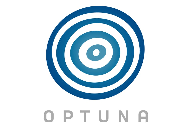

In [ ]:
Y

コメントを外せば、optunaが動きます。

勉強したい人はコメントを外して、動かしてみてください。


In [ ]:
import optuna 
import optuna.integration.lightgbm as lgbo
import lightgbm as lgb
'''
params = { 'objective': 'mae', 'metric': 'l2' }
Y = pd.DataFrame(Y,columns={'data','data2'})

lgb_train1 = lgb.Dataset(X, Y.data)
lgb_valid1 = lgb.Dataset(X, Y.data)
model1 = lgbo.train(params, lgb_train1, valid_sets=[lgb_valid1], verbose_eval=False, num_boost_round=100, early_stopping_rounds=5) 
model1.params["learning_rate"] = 0.01
model1.params["early_stopping_round"] = 100
model1.params["num_iterations"] = 8000
model1.params
'''

In [ ]:
params1={'objective': 'mae',
 'metric': 'l2',
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 251,
 'feature_fraction': 0.7,
 'bagging_fraction': 0.9251930861598833,
 'bagging_freq': 1,
 'min_child_samples': 20,
 'num_iterations': 8000,
 'early_stopping_round': 100,
 'learning_rate': 0.01}

In [ ]:
'''
lgb_train2 = lgb.Dataset(X, Y.data2)
lgb_valid2 = lgb.Dataset(X, Y.data2)
model2 = lgbo.train(params, lgb_train2, valid_sets=[lgb_valid2], verbose_eval=False, num_boost_round=100, early_stopping_rounds=5) 
model2.params["learning_rate"] = 0.01
model2.params["early_stopping_round"] = 100
model2.params["num_iterations"] = 8000
model2.params
'''

In [ ]:
params2 = {'objective': 'mae',
 'metric': 'l2',
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 250,
 'feature_fraction': 0.9520000000000001,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 5,
 'num_iterations': 8000,
 'early_stopping_round': 100,
 'learning_rate': 0.01}

In [ ]:
params = {'objective': 'mse',
 'metric': 'mse',
 'num_iterations': 8000,
 'early_stopping_round': 100,
 'learning_rate': 0.001}

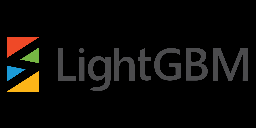

###  MultiOutputRegressor

なぜこのMultiOutputRegressorを使っているかというと、目的関数が複数あるから。

目的関数が複数ある場合は、複数のlightGBMを包みこんであげる形で動いてくれます。

In [ ]:

from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb

params={'learning_rate': 0.04, #0.02
        'objective':'mae', #mse
        'metric':'l1', #mse l2 l1=l2
        'num_leaves': 250, #9 @@
        'verbose': 0, 
        'feature_fraction': 0.5, #0.5
        'bagging_fraction': 0.5, #0.9 変化なし
        'max_depth':150 #100 
        #'bagging_fraction': 0.8, #0.7
        #'feature_fraction': 0.8 #0.7
       }
reg = MultiOutputRegressor(lgb.LGBMRegressor(**params, n_estimators=2000))#@2000

cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

P = np.zeros_like(Y, dtype=float)
P_tst = np.zeros((X_tst.shape[0], output_dim), dtype=float)
#Y = pd.DataFrame(Y,columns={'data','data2'})
for i, (i_trn, i_val) in enumerate(cv.split(X), 1):
    print(f'Training for CV #{i}')
        
    reg.fit(X[i_trn], Y[i_trn])
    tt = reg.predict(X[i_val])
    P[i_val] = label_scaler.inverse_transform(tt)
    
    tt = reg.predict(X_tst)

    P_tst += label_scaler.inverse_transform(tt) / n_fold
    
    distance_i = calc_haversine(df.latDeg_gt.values[i_val], 
                                df.lngDeg_gt.values[i_val], 
                                P[i_val, 0] + df.latDeg.values[i_val], 
                                P[i_val, 1] + df.lngDeg.values[i_val]).mean()
    print(f'CV #{i}: ',distance_i)
    
#P_tst = P_tst /   n_fold

<preCV #1:  2.195005878674228

### 普通のLightGBM

CV #1: 4.183675011673838

In [ ]:
'''
cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

P = np.zeros_like(Y, dtype=float)
P_tst = np.zeros((X_tst.shape[0], output_dim), dtype=float)
Y = pd.DataFrame(Y,columns={'data','data2'})
for i, (i_trn, i_val) in enumerate(cv.split(X), 1):
    print(f'Training for CV #{i}')
    lgb_train1 = lgb.Dataset(X[i_trn], Y.data[i_trn])
    lgb_valid1 = lgb.Dataset(X[i_val], Y.data[i_val])
    
    lgb_train2 = lgb.Dataset(X[i_trn], Y.data2[i_trn])
    lgb_valid2 = lgb.Dataset(X[i_val], Y.data2[i_val])
    

    model1 = lgb.train(params1, lgb_train1, valid_sets=[lgb_valid1], verbose_eval=100)
    model2 = lgb.train(params2, lgb_train2, valid_sets=[lgb_valid2], verbose_eval=100)
    
    a =model1.predict(X[i_val])
    b =model2.predict(X[i_val])
    tt = pd.DataFrame(columns=['a','b'],index=range(len(a)))
    tt.a = a
    tt.b = b
   
    P[i_val] = label_scaler.inverse_transform(tt)
    
    
    a =model1.predict(X_tst)
    b =model2.predict(X_tst)
    tt = pd.DataFrame(columns=['a','b'],index=range(len(a)))
    tt.a = a
    tt.b = b

    P_tst += label_scaler.inverse_transform(tt) / n_fold
    
    distance_i = calc_haversine(df.latDeg_gt.values[i_val], 
                                df.lngDeg_gt.values[i_val], 
                                P[i_val, 0] + df.latDeg.values[i_val], 
                                P[i_val, 1] + df.lngDeg.values[i_val]).mean()
    print(f'CV #{i}:',distance_i)
   '''

 
<pre>es = keras.callbacks.EarlyStopping(patience=n_stop, restore_best_weights=True)
lr = keras.callbacks.LearningRateScheduler(scheduler)

cv = KFold(n_splits=n_fold, shuffle=True, random_state=seed)

P = np.zeros_like(Y, dtype=float)
P_tst = np.zeros((X_tst.shape[0], output_dim), dtype=float)

for i, (i_trn, i_val) in enumerate(cv.split(X), 1):
    print(f'Training for CV #{i}')
    model = build_model()
    history = model.fit(X[i_trn], Y[i_trn], validation_data=(X[i_val], Y[i_val]), 
                        epochs=epochs, batch_size=batch_size, callbacks=[es, lr], verbose=0)
    P[i_val] = label_scaler.inverse_transform(model.predict(X[i_val]))
    P_tst += label_scaler.inverse_transform(model.predict(X_tst)) / n_fold
    
    distance_i = calc_haversine(df.latDeg_gt.values[i_val], 
                                df.lngDeg_gt.values[i_val], 
                                P[i_val, 0] + df.latDeg.values[i_val], 
                                P[i_val, 1] + df.lngDeg.values[i_val]).mean()
    print(f'CV #{i}: {np.percentile(distance_i, [50, 95])}')</pre>


In [ ]:
print(P.mean(axis=0), P_tst.mean(axis=0))
np.savetxt(predict_val_file, P, delimiter=',', fmt='%.6f')
np.savetxt(predict_tst_file, P_tst, delimiter=',', fmt='%.6f')

In [ ]:
distance = calc_haversine(df.latDeg_gt, df.lngDeg_gt, P[:, 0] + df.latDeg, P[:, 1] + df.lngDeg)
print(f'CV All: {np.percentile(distance, [50, 95])}')

In [ ]:
df.sort_values([phone_col, ts_col], inplace=True)
df_smoothed = df.copy()
df_smoothed[lat_col] = df[lat_col] + P[:, 0]
df_smoothed[lon_col] = df[lon_col] + P[:, 1]
df_smoothed = apply_kf_smoothing(df_smoothed)
distance = calc_haversine(df_smoothed.latDeg_gt, df_smoothed.lngDeg_gt, df_smoothed.latDeg, df_smoothed.lngDeg)
print(f'CV All (smoothed): {np.percentile(distance, [50, 95])}')

# Submission File

In [ ]:
distance_tst = calc_haversine(df_tst.latDeg, df_tst.lngDeg, P_tst[:, 0] + df_tst.latDeg, P_tst[:, 1] + df_tst.lngDeg)
print(f'CV All: {np.percentile(distance_tst, [50, 95])}')

<pre><font color="orange">numpy.percentile()は、与えた配列から指定したパーセンタイル値を計算する。</font>

percentile(a, q)
a：パーセンタイルを計算する元の配列。
q：パーセンタイル値、または配列。パーセンタイル値は0～100で、百分率表示であることに注意。1次元配列を指定すると、各要素のパーセンタイル値に相当する値が同じサイズの配列で返される。

print(np.percentile(a, [55, 75]))
 [5.5 7.5]

In [ ]:
distance_tst

In [ ]:
df_tst.sort_values([phone_col, ts_col], inplace=True)
df_tst_smoothed = df_tst.copy()
df_tst_smoothed[lat_col] = df_tst_smoothed[lat_col] + P_tst[:, 0]
df_tst_smoothed[lon_col] = df_tst_smoothed[lon_col] + P_tst[:, 1]
df_tst_smoothed

In [ ]:
df_tst_smoothed = apply_kf_smoothing(df_tst_smoothed)
df_tst_smoothed

In [ ]:
distance_tst = calc_haversine(df_tst.latDeg, df_tst.lngDeg, df_tst_smoothed.latDeg, df_tst_smoothed.lngDeg)
print(f'CV All (smoothed): {np.percentile(distance_tst, [50, 95])}')

In [ ]:
df_tst_smoothed[[phone_col, ts_col, lat_col, lon_col]].to_csv(submission_file, index=False)

In [ ]:
submission = df_tst_smoothed[[phone_col, ts_col, lat_col, lon_col]]
